In [25]:
import pandas as pd
train = pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.shape

(891, 12)

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
train = train.drop(columns=['Name', 'Cabin'])
test = test.drop(columns=['Name', 'Cabin'])

In [30]:
train_age_mean=train['Age'].mean()
test_age_mean=test['Age'].mean()

train['Age'].fillna(train_age_mean,inplace=True)
test['Age'].fillna(test_age_mean,inplace=True)

In [31]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [32]:

train.drop(columns = 'PassengerId',inplace = True)
test.drop(columns = 'PassengerId',inplace = True)


<Axes: xlabel='Pclass', ylabel='Count'>

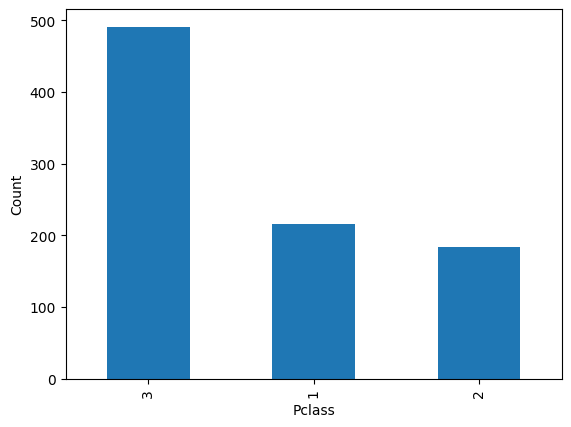

In [34]:
Pclass_count=train.Pclass.value_counts()
Pclass_count.plot(kind='bar',xlabel='Pclass',ylabel='Count')

<Axes: xlabel='Gender', ylabel='Count'>

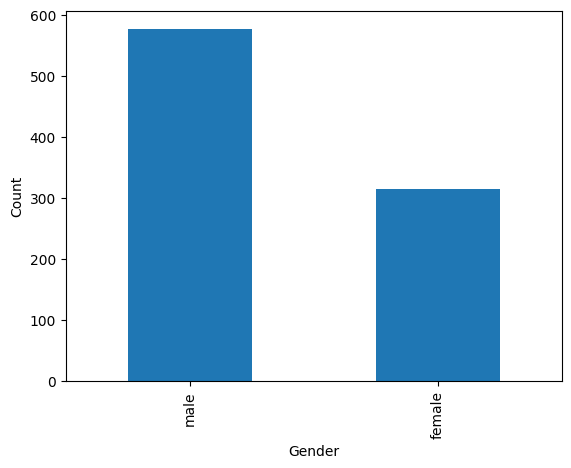

In [35]:
Gender_count = train.Sex.value_counts()
Gender_count.plot(kind='bar',xlabel='Gender',ylabel='Count')

<Axes: xlabel='Survived', ylabel='Count'>

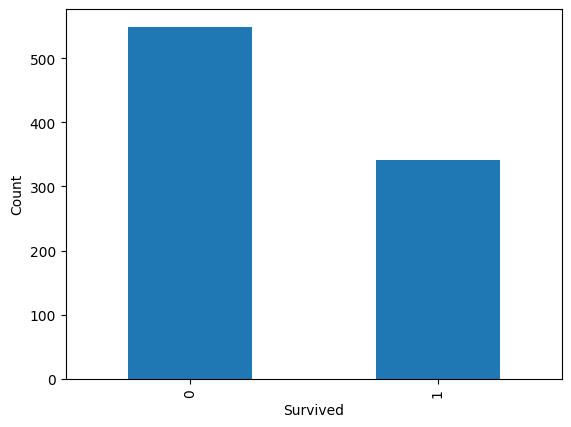

In [36]:
Survived_count = train.Survived.value_counts()
Survived_count.plot(kind='bar',xlabel='Survived',ylabel='Count')

<Axes: xlabel='Sex', ylabel='count'>

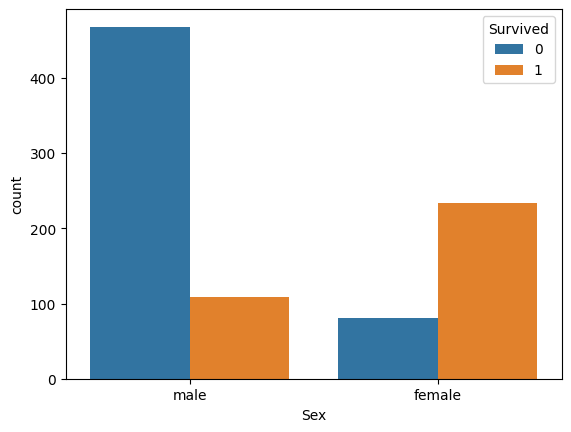

In [38]:
#using seaborn let's know hoe many men died and how many female died
import seaborn as sns 
sns.countplot(train,x='Sex',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

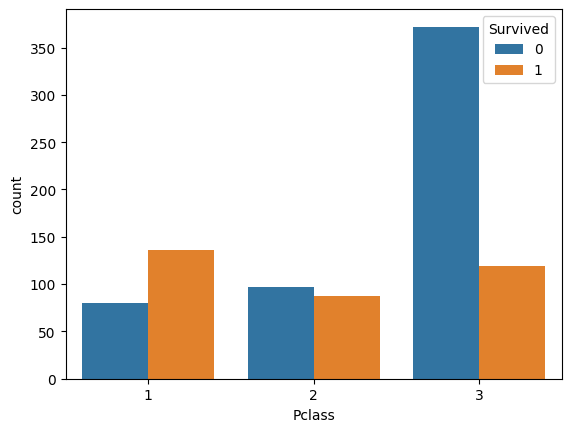

In [39]:
sns.countplot(train,x='Pclass',hue='Survived')

In [41]:
train['Sex'].replace({'male':1,'female':0},inplace=True)
test['Sex'].replace({'male':1,'female':0},inplace=True)

train['Embarked'].replace({'S':2,'C':1,'Q':0},inplace=True)
test['Embarked'].replace({'S':2,'C':1,'Q':0},inplace=True)

train.drop(columns='Ticket',inplace=True)
test.drop(columns='Ticket',inplace=True)



In [45]:
y=train.Survived.copy()
X=train.drop(columns='Survived').copy()

In [46]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=786)

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
dtc_prediction = dtc.predict(Xtest)

from sklearn.metrics import accuracy_score
dtc_score=accuracy_score(ytest,dtc_prediction)
dtc_score

0.7486033519553073

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth =15)
rfc.fit(Xtrain,ytrain)
rfc_prediction=rfc.predict(Xtest)
rfc_accuracy=accuracy_score(ytest,rfc_prediction)
rfc_accuracy
                            

0.7877094972067039

In [51]:
#improving random forest classifier 
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[10,15,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rfc=RandomForestClassifier()

grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(Xtrain,ytrain)
best_params=grid_search.best_params_
print("Best Hyperparameters",best_params)

best_rfc=RandomForestClassifier(**best_params)
best_rfc.fit(Xtrain,ytrain)

rfc_prediction = best_rfc.predict(Xtest)

rfc_score=accuracy_score(ytest,rfc_prediction)
print("Accuracy Score ",rfc_score)

Best Hyperparameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score  0.8156424581005587
